<div style="text-align: center;">
    <h1> <font style="bold"> Analisis Predictivo Avanzado </font></h1>
    <h2><font style="bold">Trabajo práctico 2</font></h2>
    <h3><font style="bold">Integrantes:</font></h3>
</div>
<div style="display: flex; justify-content: center;">
    <h4><ul>
        <li>Noguera Abril</li>
        <li>Arbues Lucas</li>
        <li>Alfie Agustin</li>
        </ul>
    </h4>
</div>

Las plataformas de streaming ofrecen una gran cantidad de películas, lo que a menudo resulta en una elección difícil para los usuarios. Esta "Parálisis por Análisis" puede afectar negativamente la experiencia del usuario, disminuyendo el compromiso con la plataforma y aumentando las tasas de cancelación de suscripciones.

# Justificacion de Negocio

El sistema de recomendación de películas está diseñado para **mejorar la experiencia del usuario** mediante la facilitación de la elección de contenidos. El desafío radica en desarrollar un mecanismo que no solo se alinee con las preferencias individuales de los usuarios sino que también fomente el descubrimiento de nuevas películas que puedan ser de su interés, con el fin de aumentar su satisfacción y fidelidad a la plataforma.

<p align="center">
  <img src="imagenes/movierecommendation.png" alt="Movie Recommendation System" width="400"/>
</p>

Este Notebook se enfocará en el desarrollo de un sistema de recomendación de películas mediante el uso de técnicas avanzadas de machine learning. Se utilizarán algoritmos de filtrado colaborativo, metodos basados en memoria y metodos colaborativos para analizar los patrones de visualización, las calificaciones y los metadatos de las películas, con el objetivo de proporcionar recomendaciones precisas y personalizadas.

Se incluirá en el proyecto una fase de despliegue (deploy) que permitirá a los usuarios interactuar con el sistema de recomendación en un entorno operativo. Mediante una interfaz sencilla, los usuarios podrán ingresar su ID y el título de una película que les haya gustado para recibir recomendaciones personalizadas. Este enfoque asegura la transición del modelo desde el desarrollo hasta su aplicación práctica, donde su efectividad puede ser evaluada en términos de mejora en la experiencia del usuario.

Este Notebook documentará el proceso completo, desde la preparación de los datos hasta el despliegue operativo del sistema, sirviendo como una guía detallada para la implementación del sistema de recomendación y la evaluación de su rendimiento en un escenario real.

# Preparacion de la Informacion

## Imports

In [1]:
import pandas as pd
import numpy as np
from IPython.display import Image, HTML
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
import ast
from ast import literal_eval
import geopandas as gpd
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity


Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


## Carga de Bases de Datos

In [2]:
movies = pd.read_csv("input/movies_metadata.csv", quotechar='"')

/var/folders/6c/17qbm4nd5318hd4bcrx68wjh0000gn/T/ipykernel_84869/3221149849.py:1: DtypeWarning: Columns (4,12) have mixed types. Specify dtype option on import or set low_memory=False.
  movies = pd.read_csv("input/movies_metadata.csv", quotechar='"')


## Preparacion de Datos

In [3]:
movies.columns

Index(['title', 'overview', 'release_date', 'vote_average', 'vote_count',
       'genres', 'id', 'original_language', 'popularity', 'adult', 'budget',
       'revenue', 'runtime', 'status', 'tagline', 'video',
       'belongs_to_collection', 'homepage', 'imdb_id', 'original_title',
       'poster_path', 'production_companies', 'production_countries',
       'spoken_languages'],
      dtype='object')

### Columnas

* **adult:** Indica si la pelicula es X-Rated o Adult.
* **belongs_to_collection:** Un diccionario que da informacion de la saga a la que la pelicula pertenece.
* **budget:** Presupuesto de la pelicula en dolares. 
* **genres:** Una lista en forma de texto de diccionarios que enumeran todos los géneros asociados con la película.
* **homepage:** La página oficial de la película.
* **id:** El ID de la película.
* **imdb_id:** El ID de IMDB de la película.
* **original_language:** El idioma en el que la película fue originalmente filmada.
* **original_title:** El título original de la película.
* **overview:** Una breve descripción de la película.
* **popularity:** La puntuación de popularidad asignada por TMDB.
* **poster_path:** La URL de la imagen del póster.
* **production_companies:** Una lista en forma de texto de las compañías de producción involucradas en la realización de la película.
* **production_countries:** Una lista en forma de texto de los países donde la película fue rodada/producida.
* **release_date:** Fecha de lanzamiento teatral de la película.
* **revenue:** Los ingresos totales de la película en dólares.
* **runtime:** La duración de la película en minutos.
* **spoken_languages:** Una lista en forma de texto de los idiomas hablados en la película.
* **status:** El estado de la película (Estrenada, Por estrenar, Anunciada, etc.)
* **tagline:** El lema publicitario de la película.
* **title:** El título oficial de la película.
* **video:** Indica si hay un video presente de la película en TMDB.
* **vote_average:** La calificación promedio de la película.
* **vote_count:** El número de votos de usuarios, según lo contado por TMDB.

In [4]:
movies.shape

(55332, 24)

In [5]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55332 entries, 0 to 55331
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  55326 non-null  object 
 1   overview               54341 non-null  object 
 2   release_date           55230 non-null  object 
 3   vote_average           55325 non-null  float64
 4   vote_count             55325 non-null  object 
 5   genres                 55331 non-null  object 
 6   id                     55331 non-null  object 
 7   original_language      55320 non-null  object 
 8   popularity             55326 non-null  object 
 9   adult                  55331 non-null  object 
 10  budget                 55331 non-null  object 
 11  revenue                55325 non-null  float64
 12  runtime                55068 non-null  object 
 13  status                 55243 non-null  object 
 14  tagline                27979 non-null  object 
 15  vi

In [6]:
movies.head(2)

,title,overview,release_date,vote_average,vote_count,genres,id,original_language,popularity,adult,...,tagline,video,belongs_to_collection,homepage,imdb_id,original_title,poster_path,production_companies,production_countries,spoken_languages
0,Expend4bles,Armed with every weapon they can get their han...,15/09/2023,6.406,764,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",299054,en,1294.274,FALSE,...,They'll die when they're dead.,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Five Nights at Freddy's,"Recently fired and desperate for work, a troub...",25/10/2023,7.932,2365,"[{'id': 27, 'name': 'Horror'}, {'id': 9648, 'n...",507089,en,1859.189,FALSE,...,Can you survive five nights?,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


La informacion actualizada no trae las siguientes columnas:
belongs_to_collection,	homepage,	imdb_id	original_title,	poster_path	production_companies,	production_countries y	spoken_languages

### Data Wrangling

El ID de IMDB no es representativo por lo que sera eliminado, el que es utilizado para vincular la informacion de las peliculas con los links, ratings y keywords es ID.

In [7]:
movies = movies.drop(['imdb_id'], axis=1)

La columna original_title representa el titulo de la pelicula en el idioma original. Para mantener la consistencia se mantiene unicamente la variable traducida **title**.

In [8]:
movies[movies['original_title'] != movies['title']][['title', 'original_title']].tail()

,title,original_title
55319,Mom,Maa
55321,St. Michael Had a Rooster,San Michele aveva un gallo
55327,Subdue,رگ خواب
55328,Century of Birthing,Siglo ng Pagluluwal
55330,Satan Triumphant,Satana likuyushchiy


In [9]:
movies = movies.drop('original_title', axis=1)

Se procesan los titulos para eliminar inconsistencias

In [10]:
# Eliminar espacios adelante y al final del titulo
movies['title'] = movies['title'].str.strip()

Se identifican los titulos repetidos y se eliminan duplicados.

In [11]:
movies['title'].value_counts()

Cinderella                                          15
Beauty and the Beast                                12
Alice in Wonderland                                 11
The Three Musketeers                                11
Hamlet                                              11
                                                    ..
The Cuenca Crime                                     1
Korczak                                              1
You're Gonna Miss Me: A Film About Roky Erickson     1
Dimensions of Dialogue                               1
Queerama                                             1
Name: title, Length: 45876, dtype: int64

In [12]:
# Calcula la cantidad de valores NaN en cada fila
movies['nan_count'] = movies.apply(lambda x: x.isna().sum(), axis=1)

# Agrupa por 'title', luego ordena dentro de cada grupo por 'nan_count', y finalmente toma la primera fila de cada grupo
movies = movies.sort_values('nan_count').groupby('title', as_index=False).first()

# Opcionalmente, puedes eliminar la columna 'nan_count' si ya no la necesitas
movies.drop('nan_count', axis=1, inplace=True)

# En el caso de que haya un mismo valor de nan_count para varios títulos, se deja solamente uno
movies = movies[movies.duplicated(subset='title', keep=False) == False]

Aunque una gran proporcion de la base presenta **revenue** 0, refiriendose a la falta de informacion de este valor, se considera esta columna como clave para el analisis exploratorio por lo que no se eliminara. Se reemplazan los valores 0 por nulos.

In [13]:
print("proporcion de informacion con revenue 0: ", round(len(movies[movies['revenue'] == 0]) * 100 / len(movies),2), "%")

proporcion de informacion con revenue 0:  82.15 %


In [14]:
movies['revenue'] = movies['revenue'].replace(0, np.nan)

Se toma una decision similar para el **budget**. Primero se convierte la columna a numerica y luego se reemplazan los valores 0 por nulos.

In [15]:
movies['budget'] = pd.to_numeric(movies['budget'], errors='coerce')
print("proporcion de informacion con budget 0: ", round(len(movies[movies['budget'] == 0]) * 100 / len(movies),2), "%")
movies['budget'] = movies['budget'].replace(0, np.nan)

proporcion de informacion con budget 0:  79.59 %


Se crea la columna profit:

In [16]:
movies['profit'] = movies['revenue'] - movies['budget']

Se procesa la fecha para que sostenga un formato constante:

In [17]:
movies['release_date'] = pd.to_datetime(movies['release_date'], errors='coerce')

/var/folders/6c/17qbm4nd5318hd4bcrx68wjh0000gn/T/ipykernel_84869/2823395270.py:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  movies['release_date'] = pd.to_datetime(movies['release_date'], errors='coerce')


Se obtiene la columna year a partir de la fecha:

In [18]:
# Obtener el año de la fecha de lanzamiento
movies['year'] = movies['release_date'].apply(lambda x: str(x).split('-')[0] if x != np.nan else np.nan)

In [19]:
movies['year'] = pd.to_numeric(movies['year'], errors='coerce')

No hay casi peliculas que sean para **adultos**, por lo que la variable no es muy representativa.

In [20]:
print("proporcion de informacion que no es para adultos: ", round(len(movies[movies['adult'] == 'FALSE']) * 100 / len(movies),2), "%")

proporcion de informacion que no es para adultos:  99.97 %


In [21]:
movies = movies.drop('adult', axis=1)

Para poder visualizar las imagenes del poster se reestructura la informacion:

In [22]:
base_poster_url = 'http://image.tmdb.org/t/p/w185/'
movies['poster_path'] = "<img src='" + base_poster_url + movies['poster_path'] + "' style='height:100px;'>"

In [23]:
poster = pd.DataFrame(movies[movies['poster_path'].notnull()]['poster_path'].tail(2))
HTML(poster.to_html(escape=False))

,poster_path
45872,
45875,


### Valores Faltantes

In [24]:
# Convierto todos los nulos a un mismo valor para poder trabajar con ellos
movies.replace([None, "nan", "", "NA", "NULL", -9999], np.nan, inplace=True)

In [25]:
nulos = (movies.isna().sum()) / (len(movies)) * 100
nulos.sort_values(ascending = False, inplace = True)

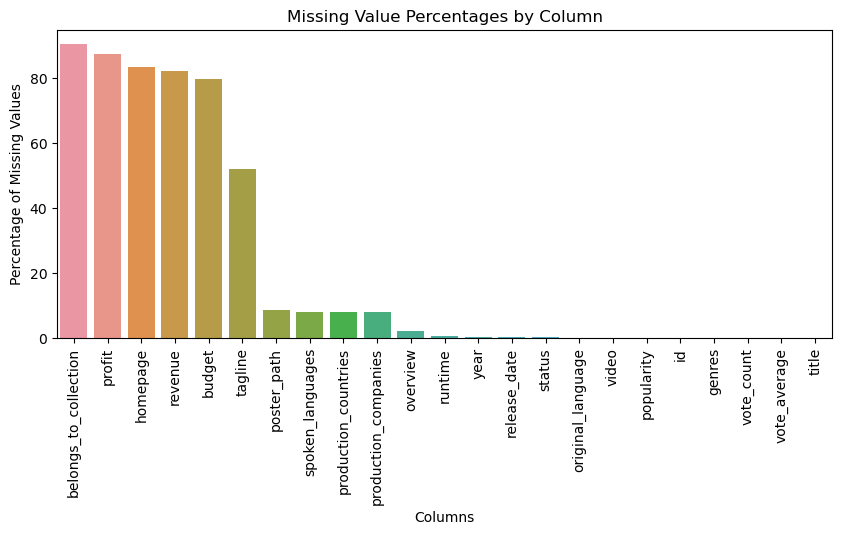

In [26]:
plt.figure(figsize=(10,4))
sns.barplot(x = nulos.index, y = nulos.values)
plt.xticks(rotation=90)
plt.xlabel('Columns')
plt.ylabel('Percentage of Missing Values')
plt.title('Missing Value Percentages by Column')
plt.show()

In [27]:
# Ajustar la precisión de visualización a 2 decimales
# pd.set_option('display.float_format', '{:.2f}'.format)

missing_percentage = movies.isnull().mean() * 100

# Convertir a DataFrame
missing_percentage = missing_percentage.reset_index()
missing_percentage.columns = ['Column', 'Nulos']

missing_percentage

,Column,Nulos
0,title,0.000000
1,overview,2.044642
2,release_date,0.209260
3,vote_average,0.002180
4,vote_count,0.002180
5,genres,0.002180
6,id,0.002180
7,original_language,0.026157
8,popularity,0.002180
9,budget,79.592815


Se eliminan todas las peliculas que no puedan ser identificadas por un id:

In [28]:
movies[(movies['id'].isna())]

,title,overview,release_date,vote_average,vote_count,genres,id,original_language,popularity,budget,...,tagline,video,belongs_to_collection,homepage,poster_path,production_companies,production_countries,spoken_languages,profit,year
23249,Munthiri Kaadu,In a Village Where they used to Honor Kill Lov...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
# Elimino pelicula con id na o nulo
movies = movies[(movies['id'].notna()) & (movies['id'] != 'ta') & (movies['id'] != '20/08/1997') & (movies['id'] != '29/09/2012') & (movies['id'] != '01/01/2014')]

In [30]:
# Convierte el id a entero
movies['id'] = movies['id'].astype('int')

# Exploratory Data Analysis (EDA)

#### Worldclouds: 
Estudiar la importancia de la presencia de ciertas palabras en los titulos y descripcion de la pelicula.

In [31]:
movies['title'] = movies['title'].astype('str')
words_title = ' '.join(movies['title'])

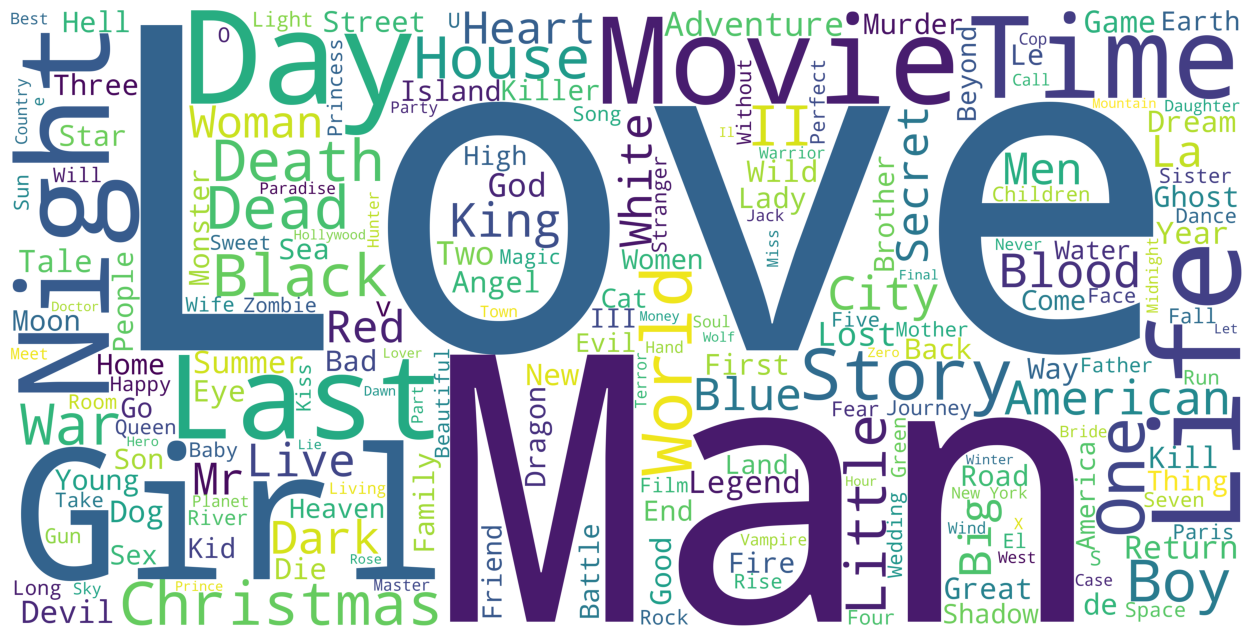

In [32]:
title_wordcloud = WordCloud(stopwords=STOPWORDS, background_color='white', height=2000, width=4000).generate(words_title)
plt.figure(figsize=(16,8))
plt.imshow(title_wordcloud)
plt.axis('off')
plt.show()

La palabra **Love** es la mas comun dentro de la eleccion de palabras para titulos. **Man**, **Day** y **Girl** tambien son palabras comunmente utilizadas. Esto encapsula bastante bien la idea de la presencia del romance en las películas.

In [33]:
movies['overview'] = movies['overview'].astype('str')
words_overview = ' '.join(movies['overview'])

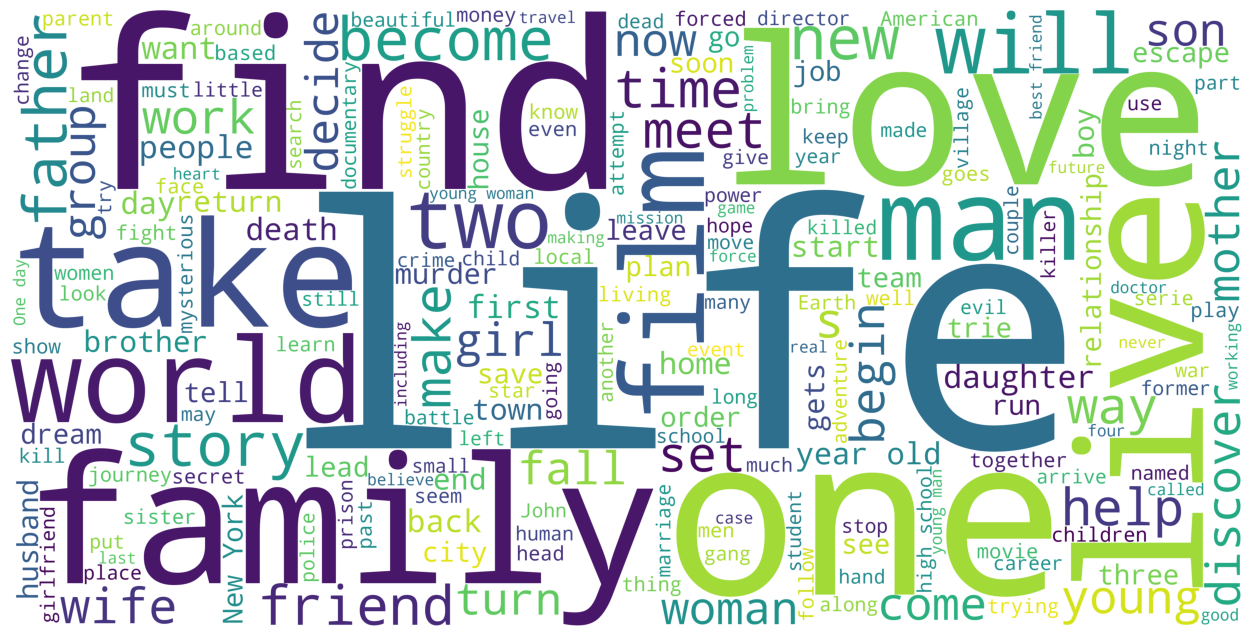

In [34]:
overview_wordcloud = WordCloud(stopwords=STOPWORDS, background_color='white', height=2000, width=4000).generate(words_overview)
plt.figure(figsize=(16,8))
plt.imshow(overview_wordcloud)
plt.axis('off')
plt.show()

**Find**, **Life** y **One** son las palabras mas frecuentes dentro de las descripciones de las peliculas. **Love**, **Man** y **Girl** no solo estan presentes en los titulos, sino que se repiten en la descripcion.

#### Lenguaje y Paises:
Estudiar la presedencia de las peliculas.

In [35]:
movies['production_countries'] = movies['production_countries'].fillna('[]').apply(ast.literal_eval)
movies['production_countries'] = movies['production_countries'].apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])

In [36]:
country = movies.apply(lambda x: pd.Series(x['production_countries']),axis=1).stack().reset_index(level=1, drop=True)
country.name = 'countries'

/var/folders/6c/17qbm4nd5318hd4bcrx68wjh0000gn/T/ipykernel_84869/3268430661.py:1: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  country = movies.apply(lambda x: pd.Series(x['production_countries']),axis=1).stack().reset_index(level=1, drop=True)


In [37]:
countries = movies.drop('production_countries', axis=1).join(country)
countries = pd.DataFrame(countries['countries'].value_counts())
countries['country'] = countries.index
countries.columns = ['count', 'country']
countries = countries.reset_index().drop('index', axis=1)
countries.head(10)

,count,country
0,19770,United States of America
1,3743,United Kingdom
2,3610,France
3,2082,Germany
4,2013,Italy
5,1659,Canada
6,1564,Japan
7,897,Spain
8,815,Russia
9,792,India


La mayoria de las peliculas fueron producidas en **Estados Unidos** dado que la mayoria de las peliculas que comprenden el dataset son en ingles.

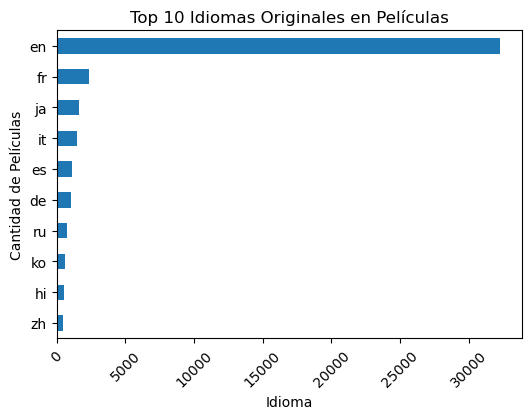

In [38]:
top_languages = movies['original_language'].value_counts().head(10)

# Invertir el orden para que el gráfico sea descendente
top_languages = top_languages.sort_values()

# Creando el gráfico de barras
plt.figure(figsize=(6, 4))
top_languages.plot(kind='barh')
plt.title('Top 10 Idiomas Originales en Películas')
plt.xlabel('Idioma')
plt.ylabel('Cantidad de Películas')
plt.xticks(rotation=45)
plt.show()

In [39]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

/var/folders/6c/17qbm4nd5318hd4bcrx68wjh0000gn/T/ipykernel_84869/3926210268.py:1: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


In [40]:
merged = world.set_index('name').join(countries.set_index('country'))

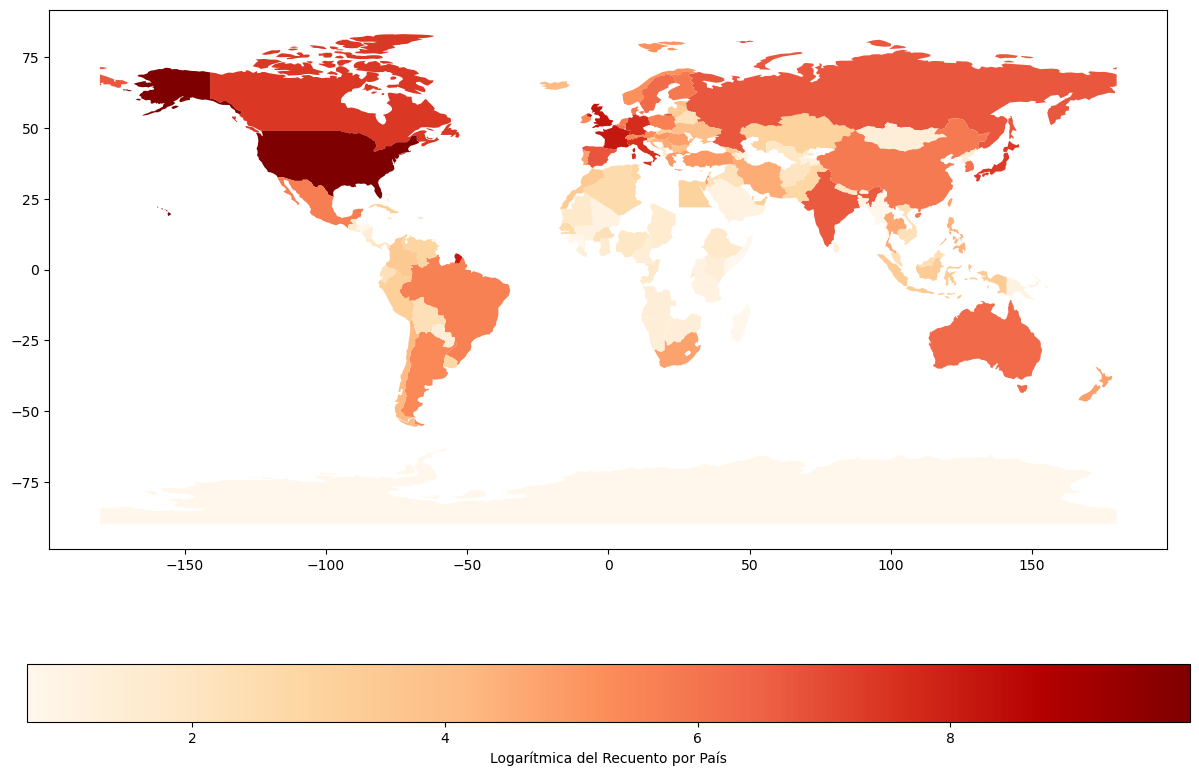

In [41]:
fig, ax = plt.subplots(1, 1, figsize=(15, 10))

# Reemplazar valores de 'count' igual a 0 con un número muy pequeño para evitar problemas con el logaritmo
merged['count_log'] = np.log(merged['count'] + 1)

merged.plot(column='count_log', ax=ax, cmap='OrRd', legend=True,
            norm=plt.Normalize(vmin=merged['count_log'].min(), vmax=merged['count_log'].max()),
            legend_kwds={'label': "Logarítmica del Recuento por País",
                         'orientation': "horizontal"})
plt.show()

Se toma el logaritmo de la cantidad en el grafico para poder representar la informacion mejor dado el desbalance presentado por la presencia mayoritaria de peliculas estadounidenses. Ademas de **Estados Unidos**, **Europa** es un gran productor de peliculas.

#### Sagas:

In [42]:
import re
def extract_name(s):
    if isinstance(s, str):
        match = re.search(r"'name':\s*'([^']*)'", s)
        if match:
            return match.group(1)
    return None

In [43]:
movies['belongs_to_collection'] = movies['belongs_to_collection'].apply(extract_name)

In [44]:
# Almaceno los registros si las compañias productoras es una lista no vacía
saga = movies[movies['belongs_to_collection'].notna()]

In [45]:
saga = saga.pivot_table(index='belongs_to_collection', values='revenue', aggfunc={'revenue': ['mean', 'sum', 'count']}).reset_index()

In [46]:
# Suponiendo que tu DataFrame se llama df
# Ajusta el formato de los números flotantes para que no usen notación científica
pd.set_option('display.float_format', '{:.0f}'.format)

In [47]:
saga.sort_values('sum', ascending=False).head(10)

,belongs_to_collection,count,mean,sum
534,Harry Potter Collection,8,963420928,7707367425
1118,Star Wars Collection,8,929311849,7434494790
626,James Bond Collection,25,282609021,7065225521
1268,The Fast and the Furious Collection,8,640637349,5125098793
934,Pirates of the Caribbean Collection,5,904315365,4521576826
1500,Transformers Collection,5,873220249,4366101244
312,Despicable Me Collection,4,922767554,3691070216
1441,The Twilight Collection,5,668421458,3342107290
591,Ice Age Collection,5,643341711,3216708553
646,Jurassic Park Collection,4,757871036,3031484143


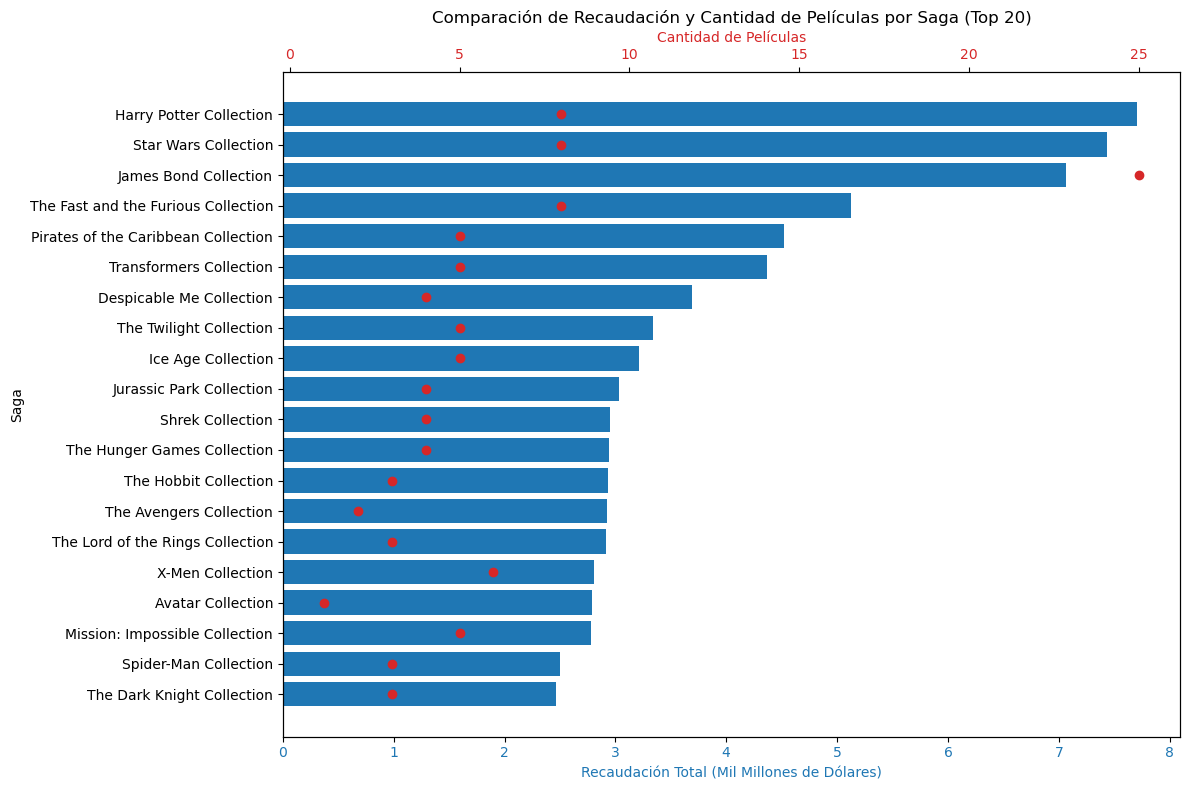

In [48]:
# Tomar las 20 franquicias principales
top_sagas = saga.sort_values(by='sum', ascending=False).head(20)
top_sagas = top_sagas.sort_values(by='sum', ascending=True)

# Configurando el gráfico
fig, ax1 = plt.subplots(figsize=(12, 8))

# Eje para la cantidad recaudada
color = 'tab:blue'
ax1.set_xlabel('Recaudación Total (Mil Millones de Dólares)', color=color)
ax1.set_ylabel('Saga')
ax1.barh(top_sagas['belongs_to_collection'], top_sagas['sum'] / 1e9, color=color)
ax1.tick_params(axis='x', labelcolor=color)

# Crear un segundo eje para la cantidad de películas
ax2 = ax1.twiny()  # Instancia un segundo eje que comparte el mismo eje y
color = 'tab:red'
ax2.set_xlabel('Cantidad de Películas', color=color)
ax2.plot(top_sagas['count'], top_sagas['belongs_to_collection'], color=color, marker='o', linestyle='None')
ax2.tick_params(axis='x', labelcolor=color)

# Título y ajustes finales
plt.title('Comparación de Recaudación y Cantidad de Películas por Saga (Top 20)')
fig.tight_layout()  # Para asegurar que no haya solapamiento de etiquetas
plt.show()

La saga de **Harry Potter** es la más exitosa en la industria cinematográfica, recaudando más de 7.707 mil millones de dólares con 8 películas. Las películas de **Star Wars** ocupan un cercano segundo lugar, con 7.403 mil millones de dólares también de 8 películas. **James Bond** está en tercer lugar, pero la saga tiene significativamente más películas en comparación con las demás en la lista y, por lo tanto, un promedio de recaudación mucho menor.

Segun la ganancia media de las sagas:

In [49]:
saga.sort_values('mean', ascending=False).head(10)

,belongs_to_collection,count,mean,sum
109,Avatar Collection,1,2787965087,2787965087
1198,The Avengers Collection,2,1462480802,2924961604
465,Frozen Collection,1,1274219009,1274219009
432,Finding Nemo Collection,2,984453212,1968906425
1303,The Hobbit Collection,3,978507785,2935523356
1339,The Lord of the Rings Collection,3,972181581,2916544743
534,Harry Potter Collection,8,963420928,7707367425
1118,Star Wars Collection,8,929311849,7434494790
312,Despicable Me Collection,4,922767554,3691070216
934,Pirates of the Caribbean Collection,5,904315365,4521576826


La **Saga Avatar**, aunque actualmente solo consta de una película, es la franquicia más exitosa de todos los tiempos, con esa única película recaudando cerca de 3 mil millones de dólares. La **Saga de Harry Potter** sigue siendo la más exitosa con al menos 5 películas.

#### Companias Productoras:

In [50]:
movies['production_companies'] = movies['production_companies'].apply(extract_name)

In [51]:
# Almaceno los registros si las compañias productoras es una lista no vacía
companies = movies[movies['production_companies'].notna()]

In [52]:
companies = companies.pivot_table(index='production_companies', values='revenue', aggfunc={'revenue': ['sum', 'mean', 'count']}).reset_index()

In [53]:
companies.sort_values('sum', ascending=False).head(10)

,production_companies,count,mean,sum
6773,Paramount Pictures,364,124316378,45251161524
9335,Universal Pictures,379,116558171,44175546804
9596,Walt Disney Pictures,138,262991957,36292890050
2073,Columbia Pictures,221,138471202,30602135588
9201,Twentieth Century Fox Film Corporation,269,108766839,29258279795
6305,New Line Cinema,180,86878802,15638184400
9488,Village Roadshow Pictures,73,167963771,12261355291
9615,Warner Bros.,158,77327976,12217820211
2650,DreamWorks SKG,62,179908795,11154345261
5403,Lucasfilm,22,449928232,9898421106


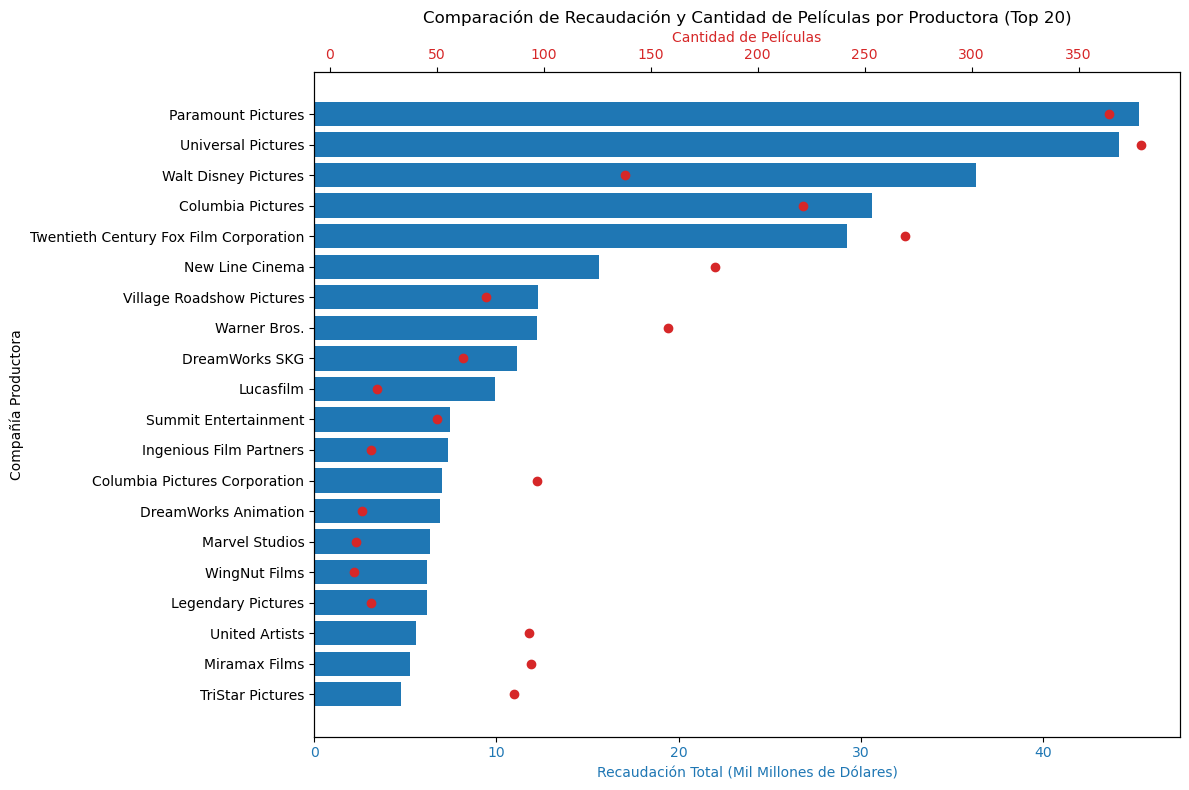

In [54]:
# Tomar las 20 franquicias principales
top_companies = companies.sort_values(by='sum', ascending=False).head(20)
top_companies = top_companies.sort_values(by='sum', ascending=True)

# Configurando el gráfico
fig, ax1 = plt.subplots(figsize=(12, 8))

# Eje para la cantidad recaudada
color = 'tab:blue'
ax1.set_xlabel('Recaudación Total (Mil Millones de Dólares)', color=color)
ax1.set_ylabel('Compañía Productora')
ax1.barh(top_companies['production_companies'], top_companies['sum'] / 1e9, color=color)
ax1.tick_params(axis='x', labelcolor=color)

# Crear un segundo eje para la cantidad de películas
ax2 = ax1.twiny()  # Instancia un segundo eje que comparte el mismo eje y
color = 'tab:red'
ax2.set_xlabel('Cantidad de Películas', color=color)
ax2.plot(top_companies['count'], top_companies['production_companies'], color=color, marker='o', linestyle='None')
ax2.tick_params(axis='x', labelcolor=color)

# Título y ajustes finales
plt.title('Comparación de Recaudación y Cantidad de Películas por Productora (Top 20)')
fig.tight_layout()  # Para asegurar que no haya solapamiento de etiquetas
plt.show()

**Paramount Pictures** y **Universal Pictures** se destacan como las productoras con el mayor número de películas, aunque no necesariamente es la que lidera en términos de recaudación por pelicula, lo que sugiere una estrategia de producción más enfocada en cantidad. Por otro lado, algunas productoras como **Walt Disney Pictures** y **Pixar Animation Studios**, presentan una menor cantidad de producciones pero con una recaudación total muy alta, indicando que sus películas tienden a ser éxitos que generan ingresos significativos.

#### Popularidad, Voto Promedio y Cantidad de Votos:
En esta sección, trabajaremos con las métricas proporcionadas por los usuarios de TMDB. Intentaremos obtener una comprensión más profunda de las características de popularidad, promedio de votos y conteo de votos e intentaremos deducir cualquier relación entre ellas, así como con otras características numéricas como el presupuesto y los ingresos.

In [55]:
# Convertir las columnas popularity, vote_count y vote_average a numéricas
movies['popularity'] = pd.to_numeric(movies['popularity'], errors='coerce')
movies['vote_count'] = pd.to_numeric(movies['vote_count'], errors='coerce')
movies['vote_average'] = pd.to_numeric(movies['vote_average'], errors='coerce')

In [56]:
movies.describe()

,vote_average,vote_count,id,popularity,budget,revenue,profit,year
count,45874,45874,45874,45874,9362,8185,5874,45780
mean,6,166,149806,6,23944647,74158221,64651372,1994
std,2,742,197335,30,38414701,163594159,157606049,24
min,0,0,2,0,1,1,-185600000,1874
25%,5,3,28300,0,2200000,2543216,-1871871,1981
50%,6,11,68726,1,10000000,17322136,11689234,2003
75%,7,47,207694,5,28000000,69633110,66205999,2012
max,10,27972,1203973,2719,460000000,2800000000,2550965087,2027


<Axes: ylabel='Frequency'>

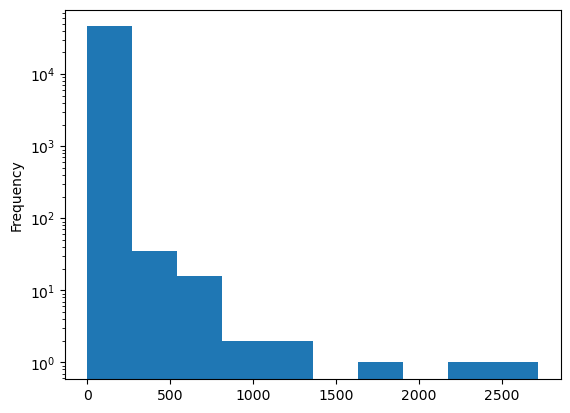

In [57]:
# Boxplot de la popularidad
# sns.distplot(movies['popularity'])
movies['popularity'].plot(logy=True, kind='hist')

La popularidad parece seguir una distribucion Lognormal, por lo que son muchos con baja popularidad y pocos que consiguen llegar a un valor alto. La media es 2.9, pero el maximo llega a 2719. De todas formas, como se ve en el grafico, todas las peliculas bajo el percentil 75 tienen un valor menor a 9.

La popularidad de las peliculas se mide segun (https://developer.themoviedb.org/docs/popularity-and-trending): 
- Number of votes for the day
- Number of views for the day
- Number of users who marked it as a "favourite" for the day
- Number of users who added it to their "watchlist" for the day
- Release date
- Number of total votes
- Previous days score

In [58]:
movies[['title', 'popularity', 'year']].sort_values('popularity', ascending=False).head(10)

,title,popularity,year
25271,Oppenheimer,2719,2023
34623,The Creator,2234,2023
12617,Five Nights at Freddy's,1859,2023
11791,Expend4bles,1294,2023
22602,Mission: Impossible - Dead Reckoning Part One,1145,2023
12125,Fast X,973,2023
35301,The Equalizer 3,847,2023
36613,The Hunger Games: The Ballad of Songbirds & Sn...,800,2023
29129,Saw X,755,2023
37923,The Marvels,713,2023


In [59]:
# Pelicula mas popular por año
popular_year = movies.sort_values('popularity', ascending=False).groupby('year').first().reset_index()

In [60]:
import plotly.express as px

# Crea un gráfico de barras interactivo con Plotly Express
fig = px.bar(
    popular_year,
    x='popularity',
    y='title',
    orientation='h',  # Gráfico de barras horizontal
    color='year',  # Colorea por año
    title='Película más popular por año'
)

# Configura los ejes y el título del gráfico
fig.update_layout(
    xaxis_title='Popularidad',
    yaxis_title='Título de la película',
    yaxis=dict(
        categoryorder='array', 
        categoryarray=popular_year.sort_values('year', ascending=False)['year'].unique()
    ),
    coloraxis_showscale=False  # Oculta la barra de color si no la necesitas
)

# Muestra el gráfico
fig.show()

<Axes: xlabel='vote_average'>

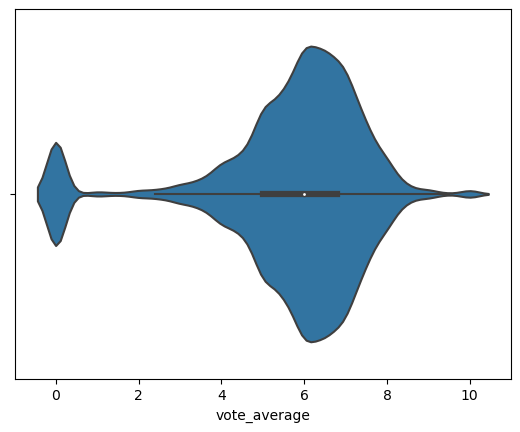

In [61]:
sns.violinplot(x=movies['vote_average'])

Parece que los votantes son bastante estrictos con sus notas, la media de los votos es de 6 de 10. Hay una gran elevacion en la distribucion en la puntuacion minima, pero esto puede ser producto de peliculas que no tuvieron evaluacion por votantes.

Para un analisis mas certero se tendran en cuenta unicamente los valores de votacion con mas de 5000 votos. Este criterio es empleado por IMDB's para seleccionar el top 250 peliculas.

<Axes: xlabel='vote_average'>

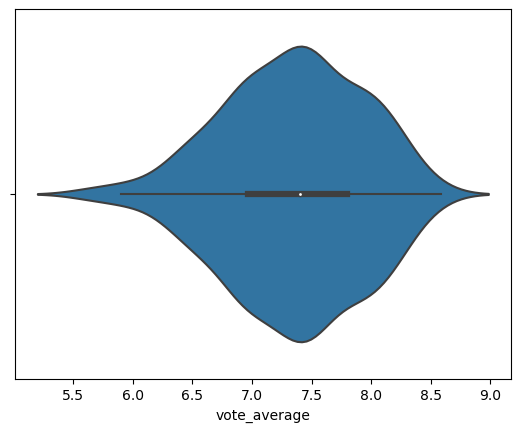

In [62]:
sns.violinplot(x=movies.loc[movies['vote_count'] > 5000,'vote_average'])

En este caso, se puede ver que la distribucion de los votos promedio varia entre 4 y 10. Por lo que los votantes son mas propensos a criticar positivamente las peliculas.

In [63]:
movies[movies['vote_count'] > 5000][['title', 'vote_average', 'vote_count' ,'year']].sort_values('vote_average', ascending=False).head(10)

,title,vote_average,vote_count,year
35980,The Godfather Part II,9,11453,1974
39746,The Shawshank Redemption,8,8358,1994
35979,The Godfather,8,6024,1972
31188,Spider-Man: Into the Spider-Verse,8,14237,2018
21145,L√©on: The Professional,8,13810,1994
12360,Fight Club,8,9678,1999
27129,Pulp Fiction,8,8670,1994
34758,The Dark Knight,8,12269,2008
12610,Five Feet Apart,8,5294,2019
27206,Puss in Boots: The Last Wish,8,6627,2022


**The Godfather** y **The Shawshank Redemption** son las dos películas más aclamadas por la crítica en la base de datos de TMDB. Tienen una calificación de  9 en TMDB.

#### Generos:
Distribucion de genero y exploracion de tendencias.

In [64]:
def get_names(column):
    # Aplica ast.literal_eval para interpretar las cadenas como listas de diccionarios
    column = column.apply(lambda x: ast.literal_eval(x) if not pd.isna(x) else x)

    # Extrae los nombres de la lista de diccionarios
    column = column.apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])

    return column

In [65]:
movies['genres'] = get_names(movies['genres'])

In [66]:
movies['genres'].head()

0                            [Documentary]
1                          [Comedy, Drama]
2    [Horror, Action, Adventure, Thriller]
3       [Drama, Mystery, Horror, Thriller]
4                            [Documentary]
Name: genres, dtype: object

In [67]:
s = movies.apply(lambda x: pd.Series(x['genres']),axis=1).stack().reset_index(level=1, drop=True)
s.name = 'genre'
genres = movies.drop('genres', axis=1).join(s)

In [68]:
genres_count = genres['genre'].value_counts()
genres_count = genres_count.reset_index()
genres_count.columns = ['Genre', 'Count']

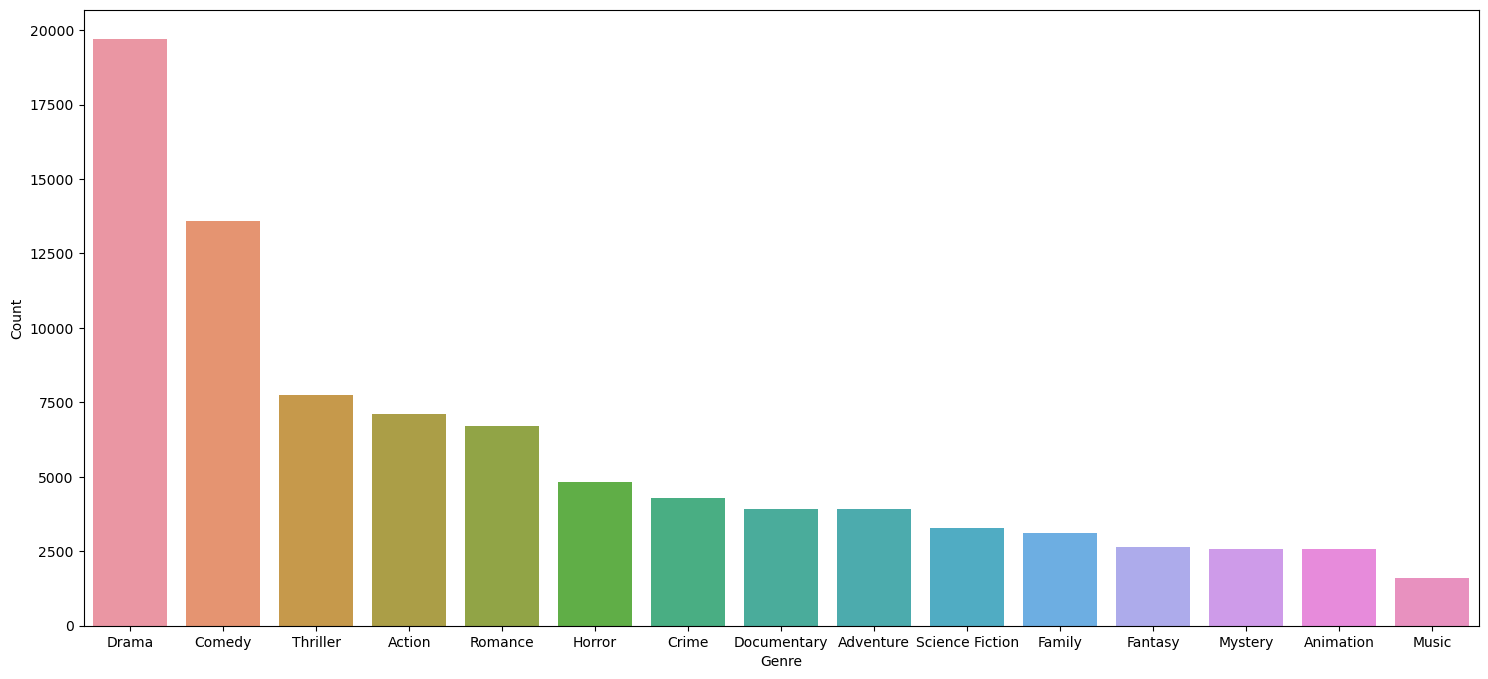

In [69]:
plt.figure(figsize=(18,8))
sns.barplot(x='Genre', y='Count', data=genres_count.head(15))
plt.show()

El **drama** es el género más común, con casi la mitad de las películas. La **comedia** llega en un distante segundo lugar, con un 25% de las películas. Otros géneros principales representados en el top 10 son **Acción, Terror, Crimen, Misterio, Ciencia Ficción, Animación y Fantasía**.

Para evaluar tendencias solo estaremos observando tendencias a partir del año 2000. Consideraremos solo aquellos temas que aparezcan en los 10 géneros más populares. 

In [70]:
tendencia_genres = genres[(genres['genre'].isin(genres_count['Genre'].head(10))) & (genres['year'] >= 2000) & (genres['year'] <= 2023)]

In [71]:
ctab = pd.crosstab(tendencia_genres['year'], tendencia_genres['genre'])
ctab = ctab.div(ctab.sum(axis=1), axis=0)

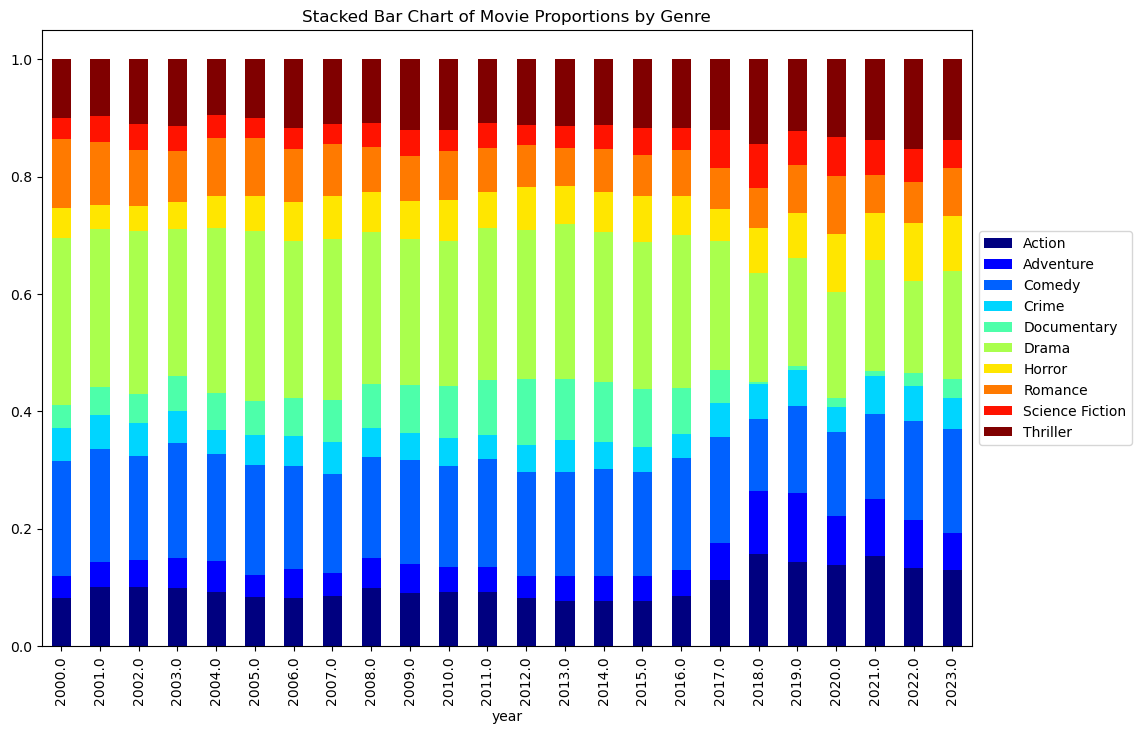

In [72]:
ctab.plot(kind='bar', stacked=True, colormap='jet', figsize=(12,8))
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title("Stacked Bar Chart of Movie Proportions by Genre")
plt.show()

La proporción de películas de cada género se ha mantenido bastante constante desde principios de este siglo, las mayores diferenciaciones se encuentran a partir del 2017. La proporción de películas **dramáticas** y **comedias** han caído. Las películas de **Thriller** y **Horror** han aumentado ligeramente.

<Figure size 800x2000 with 0 Axes>

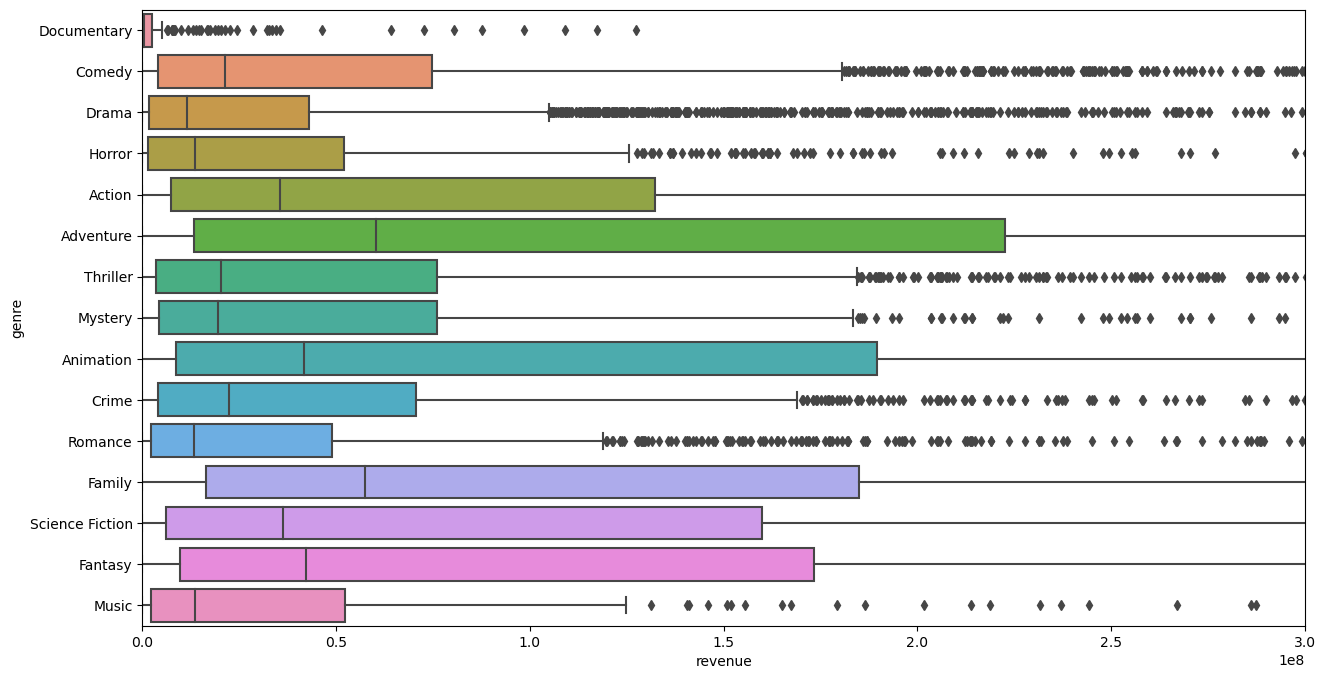

In [73]:
tendencia_genres = genres[(genres['genre'].isin(genres_count['Genre'].head(15)))]
plt.figure(figsize=(8,20))
fig, ax = plt.subplots(nrows=1, ncols=1,figsize=(15, 8))
sns.boxplot(y=tendencia_genres["genre"], x=tendencia_genres["revenue"], ax =ax)
ax.set_xlim([0, 3e8])
plt.show()

Las películas de **Aventura**, **Animación** y **Familia** tienen el rango intercuartíl más amplio, así como la mediana de ingresos más alta entre todos los géneros representados. **Fantasía**, **Ciencia Ficción** tienen ingresos medianos similares aunque no son tan frecuentes como se analizo anteriormente.

#### Cast y Crew

In [74]:
credits_df = pd.read_csv('input/credits.csv')
credits_df.head()

,id,cast,crew
0,299054,"[{'cast_id': 976, 'name': 'Jason Statham', 'ch...","[{'crew_id': 966, 'name': 'Tim Maurice-Jones',..."
1,609681,"[{'cast_id': 60073, 'name': 'Brie Larson', 'ch...","[{'crew_id': 7232, 'name': 'Sarah Halley Finn'..."
2,670292,"[{'cast_id': 1117313, 'name': 'John David Wash...","[{'crew_id': 947, 'name': 'Hans Zimmer', 'depa..."
3,385687,"[{'cast_id': 12835, 'name': 'Vin Diesel', 'cha...","[{'crew_id': 1302, 'name': 'Susie Figgis', 'de..."
4,951491,"[{'cast_id': 2144, 'name': 'Tobin Bell', 'char...","[{'crew_id': 2127, 'name': 'James Wan', 'depar..."


In [75]:
# Merge movies and credits DataFrames
movies = movies.merge(credits_df, on='id', how='left').drop_duplicates(subset='id', keep='first')

In [76]:
def get_director(column):
    # Asegúrate de que los datos están en formato de lista
    column = column.apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)
    
    # Ahora itera sobre la lista y encuentra el director, asegurándote de que la entrada sea iterable
    director = column.apply(lambda crew: next((i['name'] for i in crew if i['department'] == 'Directing'), np.nan) if isinstance(crew, list) else np.nan)

    return director

In [77]:
movies['director'] = get_director(movies['crew'])

In [78]:
movies['cast'] = get_names(movies['cast'])
movies['crew'] = get_names(movies['crew'])

In [79]:
movies['cast_size'] = movies['cast'].apply(lambda x: len(x))
movies['crew_size'] = movies['crew'].apply(lambda x: len(x))

In [80]:
s = movies.apply(lambda x: pd.Series(x['cast']),axis=1).stack().reset_index(level=1, drop=True)
s.name = 'actor'
actors = movies.drop('cast', axis=1).join(s)

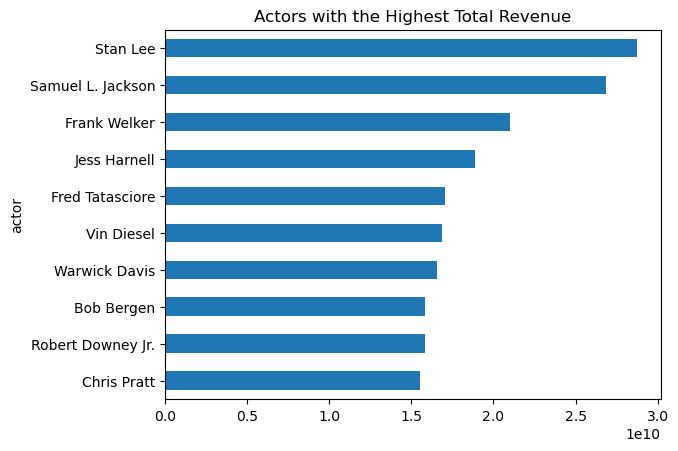

In [81]:
plt.title('Actors with the Highest Total Revenue')
actors.groupby('actor')['revenue'].sum().sort_values(ascending=False).head(10).sort_values().plot(kind='barh')
plt.show()

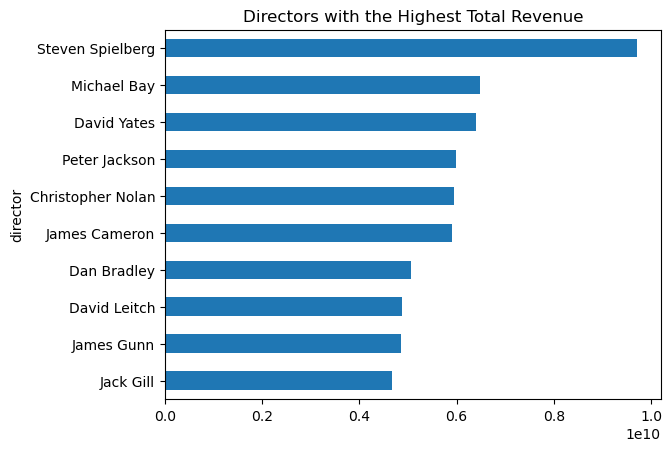

In [82]:
plt.title('Directors with the Highest Total Revenue')
movies.groupby('director')['revenue'].sum().sort_values(ascending=False).head(10).sort_values().plot(kind='barh')
plt.show()

# Sistema de Recomendación

### Content Based Recommender:

Utiliza características de las películas como género, director, actores, descripción, y calificaciones.

Por ejemplo, si a un usuario le gustan las películas de ciencia ficción, el sistema recomendaría otras películas de ciencia ficción con actores o directores similares.

#### En base al overview:

In [88]:
movies['overview'].head()

0    Through intimate interviews, provocative art, ...
1    A pair of horny college guys get summer jobs a...
2    As a grisly virus rampages a city, a lone man ...
3    Inspired by actual events, a group of 12 year ...
4    From her childhood bedroom in the Chicago subu...
Name: overview, dtype: object

In [195]:
# Convierto todos los nulos a un mismo valor para poder trabajar con ellos
movies.replace([None, "nan", "", "NA", "NULL", -9999], np.nan, inplace=True)

In [90]:
print('Proporcion de Nulos: ', round(movies['overview'].isna().sum() * 100 / len(movies),2),'%')

Cantidad de Nulos:  2.05 %


In [91]:
df = movies[movies['overview'].notna()]

No se tendra en cuenta las peliculas sin descripcion.

Se utiliza TF-IDF para transformar la descripcion. Esta tecnica nos dira **que tan relevante es una palabra en el overview, para la colección de peliculas**.

In [92]:
tfidf = TfidfVectorizer(stop_words='english')

tags_matrix = tfidf.fit_transform(df['overview'])

tags_matrix.shape

(44684, 75728)

Aproximadamente 76000 palabras fueron utilizadas para describir las 45000 peliculas.

In [93]:
# Obtener nombres de características (palabras)
feature_names = tfidf.get_feature_names_out()

# Sumar las frecuencias TF-IDF de cada palabra
sums = tags_matrix.sum(axis=0)

# Crear un DataFrame con palabras y sus frecuencias
data = []
for col, sum in zip(feature_names, sums.A1):
    data.append((col, sum))

word_freq_df = pd.DataFrame(data, columns=['word', 'freq'])

# Ordenar por frecuencia
word_freq_df = word_freq_df.sort_values(by='freq', ascending=False)

# Mostrar las palabras más frecuentes
print(word_freq_df.head(10))

         word  freq
38434    life   587
73952   young   551
40420     man   501
45852     new   463
23327    film   448
22544  family   436
39267    love   432
73232   world   419
63553   story   408
73096   woman   394


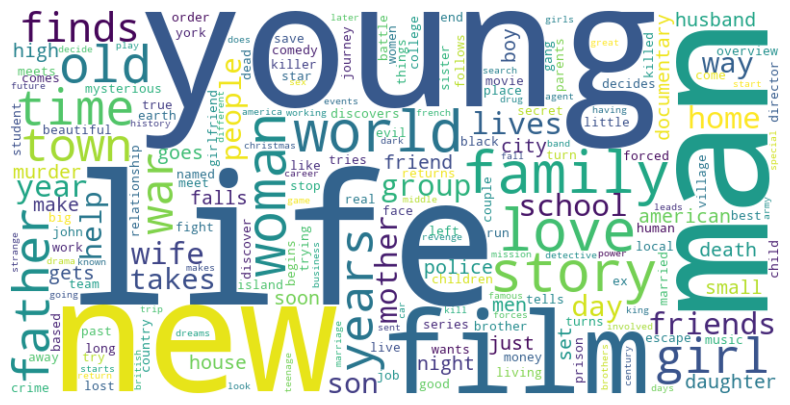

In [94]:
word_freq_dict = word_freq_df.set_index('word')['freq'].to_dict()

# Crear el word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq_dict)

# Visualizar el word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

Se calcula la **similitud coseno** entre las descripciones de las películas y se crea una matriz de similitud.

$$
\text{cosine\_similarity}(A, B) = \frac{A \cdot B}{\|A\| \cdot \|B\|}
$$


In [95]:
similarity_matrix = cosine_similarity(tags_matrix,tags_matrix)

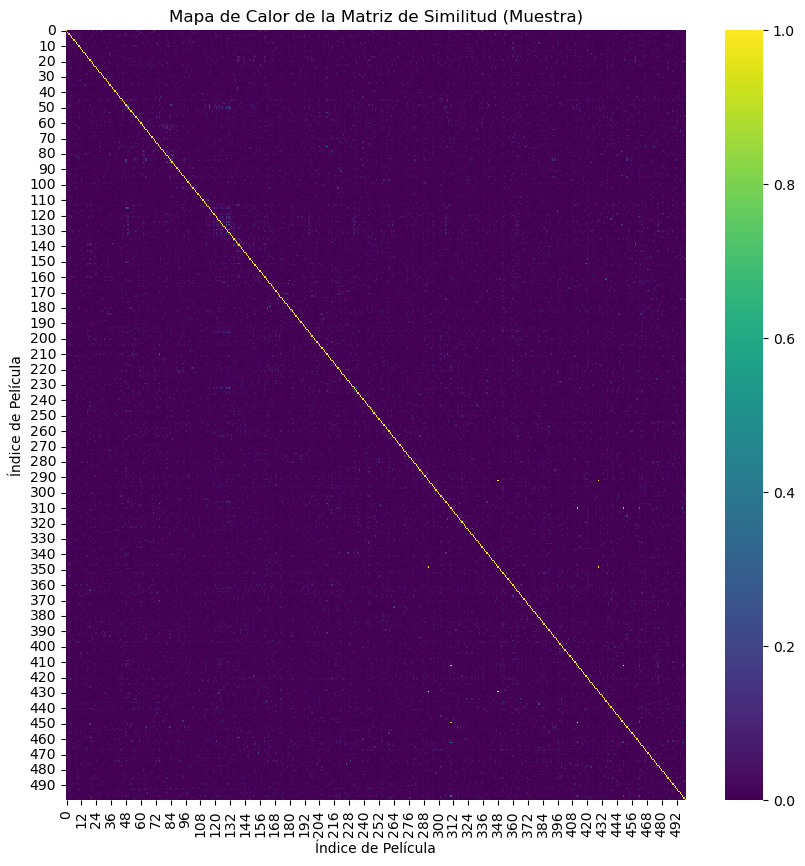

In [168]:
sampled_matrix = similarity_matrix[:500, :500]

# Crear el mapa de calor
plt.figure(figsize=(10, 10))
sns.heatmap(sampled_matrix, cmap='viridis')
plt.title('Mapa de Calor de la Matriz de Similitud (Muestra)')
plt.xlabel('Índice de Película')
plt.ylabel('Índice de Película')
plt.show()

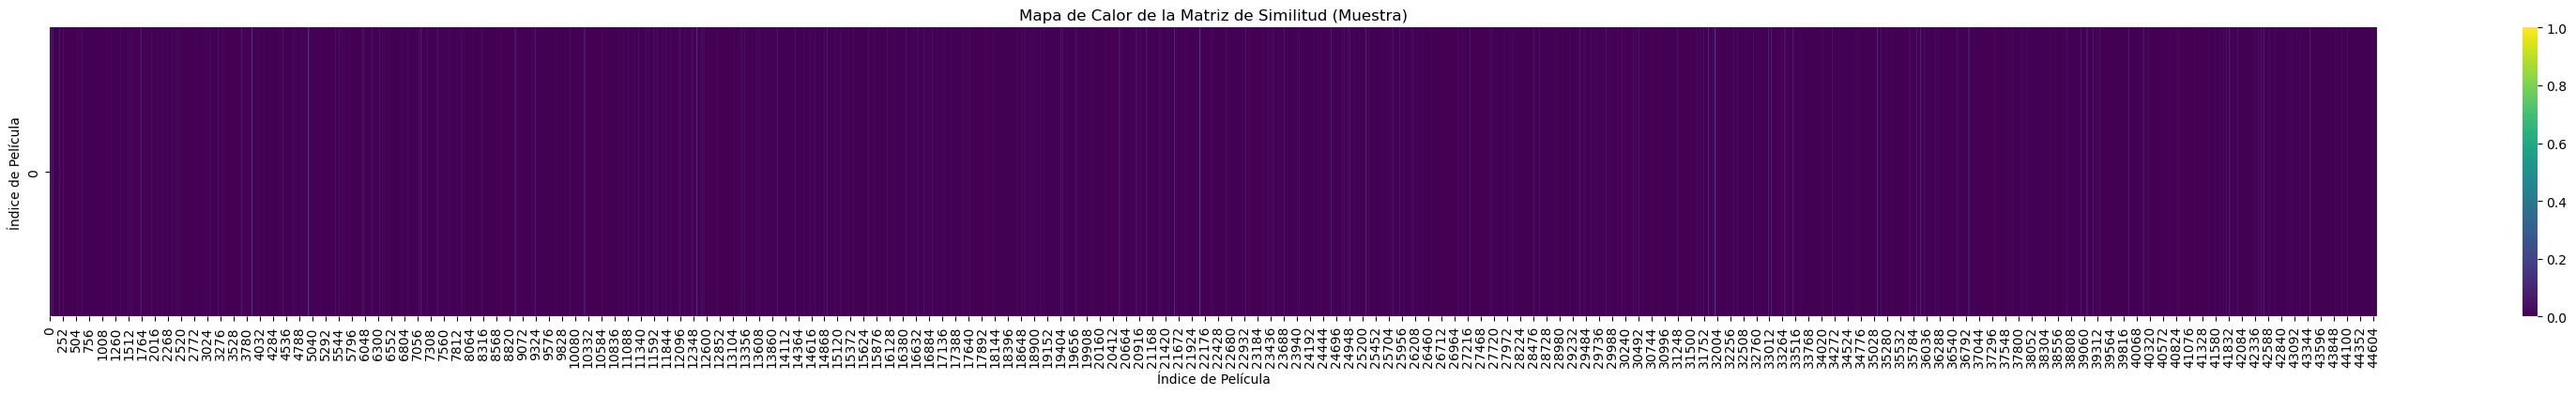

In [185]:
sampled_matrix = similarity_matrix[:1, :]

# Crear el mapa de calor
plt.figure(figsize=(40, 4))
sns.heatmap(sampled_matrix, cmap='viridis')
plt.title('Mapa de Calor de la Matriz de Similitud (Muestra)')
plt.xlabel('Índice de Película')
plt.ylabel('Índice de Película')
plt.show()

Se grafica una muestra para ver que tan representativo es el metodo para hacer una recomendacion. Pero como se puede ver, los valores de la similitud coseno tienden a ser cercanos a 0, por lo que las recomendaciones no seran del todo confiables.

In [246]:
def recommender(movie, n=30):
    # Encuentra el índice de la película proporcionada en el DataFrame.
    idx = df.loc[df['title'] == movie, :].index[0]

    # Obtén los puntajes de similitud con otras películas.
    similarity_score = list(enumerate(similarity_matrix[idx]))

    # Ordena los puntajes de similitud en orden descendente.
    similarity_score = sorted(similarity_score, key=lambda x: x[1], reverse=True)

    # Selecciona los puntajes de las 'n' películas más similares, excluyendo la primera que es la propia película introducida.
    similarity_score = similarity_score[1:n + 1]

    # Obtiene los índices de las películas más similares y sus puntajes de similitud.
    movie_indices = [i[0] for i in similarity_score]
    scores = [i[1] for i in similarity_score]

    # Crea un DataFrame con títulos de películas y sus puntajes de similitud.
    pd.set_option('display.float_format', '{:.2f}'.format)
    movie_scores = pd.DataFrame({
        'title': df['title'].iloc[movie_indices],
        'similarity_score': scores
    })

    return movie_scores

In [180]:
movie = df.loc[0,'title']
print('Película: ', movie)

recomendacion = recommender(movie,5)
print('Películas similares: ')
for index, row in recomendacion.iterrows():
    print(f"- {row['title']} (Score: {row['similarity_score']:.3f})")

Película:  !Women Art Revolution
Películas similares: 
- The Cool School (Score: 0.273)
- JLG/JLG: Self-Portrait in December (Score: 0.269)
- Museum Hours (Score: 0.246)
- Let Fury Have the Hour (Score: 0.244)
- The Object of Beauty (Score: 0.241)


In [245]:
movie = 'Despicable Me'
print('Película: ', movie)

recomendacion = recommender(movie,5)
print('Películas similares: ')
for index, row in recomendacion.iterrows():
    print(f"- {row['title']} (Score: {row['similarity_score']:.3f})")

Película:  Despicable Me
Películas similares: 
- The Big Heat (Score: 0.335)
- Sudden Fear (Score: 0.306)
- Narrow Margin (Score: 0.277)
- The Great Locomotive Chase (Score: 0.269)
- The Good Die Young (Score: 0.256)


In [183]:
movie = "Harry Potter and the Philosopher's Stone"
print('Película: ', movie)

recomendacion = recommender(movie,5)
print('Películas similares: ')
for index, row in recomendacion.iterrows():
    print(f"- {row['title']} (Score: {row['similarity_score']:.3f})")

Película:  Harry Potter and the Philosopher's Stone
Películas similares: 
- Joy Division (Score: 0.264)
- Heavy Metal in Baghdad (Score: 0.251)
- X: The Unheard Music (Score: 0.202)
- Metal: A Headbanger's Journey (Score: 0.191)
- The Decline of Western Civilization Part II: The Metal Years (Score: 0.187)


#### En base al cast, director, keywords y genero:

Se vincula la base con los keywords:

In [186]:
keywords_df = pd.read_csv('input/keywords.csv')
keywords_df.head()

,Unnamed: 0,id,keywords
0,0.00,385687,"[{'id': 9663, 'name': 'sequel'}, {'id': 9748, ..."
1,1.00,299054,"[{'id': 9663, 'name': 'sequel'}, {'id': 12551,..."
2,2.00,951491,"[{'id': 1547, 'name': 'mexico city, mexico'}, ..."
3,3.00,926393,"[{'id': 131, 'name': 'italy'}, {'id': 266013, ..."
4,4.00,565770,"[{'id': 2898, 'name': 'armor'}, {'id': 9715, '..."


In [187]:
# Merge movies and credits DataFrames
movies = movies.merge(keywords_df, on='id', how='left').drop_duplicates(subset='id', keep='first')

In [189]:
movies['keywords'] = get_names(movies['keywords'])

Se selecciona unicamente los top 3 actores:

In [192]:
movies['cast'] = movies['cast'].apply(lambda x: x[:3] if len(x) >= 3 else x)

In [255]:
df = movies[['title', 'cast', 'director', 'keywords', 'genres']]

In [256]:
df = df.applymap(lambda x: np.nan if x == [] else x)

In [261]:
print('Proporcion de Nulos: ')
print( round(df.isna().sum() * 100 / len(movies),2))

Proporcion de Nulos: 
title      0.00
cast       0.00
director   0.00
keywords   0.00
genres     0.00
dtype: float64


In [258]:
df = df.dropna()

Se une toda la informacion para aplicar TF-IDF nuevamente. Se agrega multiples veces el nombre del director para darle mayor peso en la prediccion.

In [266]:
def create_soup(x):
    return ' '.join(x['keywords']) + ' ' + ' '.join(x['cast']) + ' ' + x['director'] + ' ' + x['director'] + ' ' + ' '.join(x['genres'])

In [267]:
df['soup'] = df.apply(create_soup, axis=1)

In [268]:
tfidf = TfidfVectorizer(stop_words='english')

tags_matrix = tfidf.fit_transform(df['soup'])

tags_matrix.shape

(30492, 47237)

Aproximadamente 47237 palabras fueron utilizadas para describir las 30000 peliculas. Las palabras unicas disminuyeron.

In [269]:
# Obtener nombres de características (palabras)
feature_names = tfidf.get_feature_names_out()

# Sumar las frecuencias TF-IDF de cada palabra
sums = tags_matrix.sum(axis=0)

# Crear un DataFrame con palabras y sus frecuencias
data = []
for col, sum in zip(feature_names, sums.A1):
    data.append((col, sum))

word_freq_df = pd.DataFrame(data, columns=['word', 'freq'])

# Ordenar por frecuencia
word_freq_df = word_freq_df.sort_values(by='freq', ascending=False)

# Mostrar las palabras más frecuentes
print(word_freq_df.head(10))

            word   freq
11753      drama 723.65
8753      comedy 670.32
42161   thriller 448.18
35830    romance 428.02
361       action 425.76
19032     horror 359.98
21004       john 346.69
9486       crime 336.38
13613     family 309.21
510    adventure 285.19


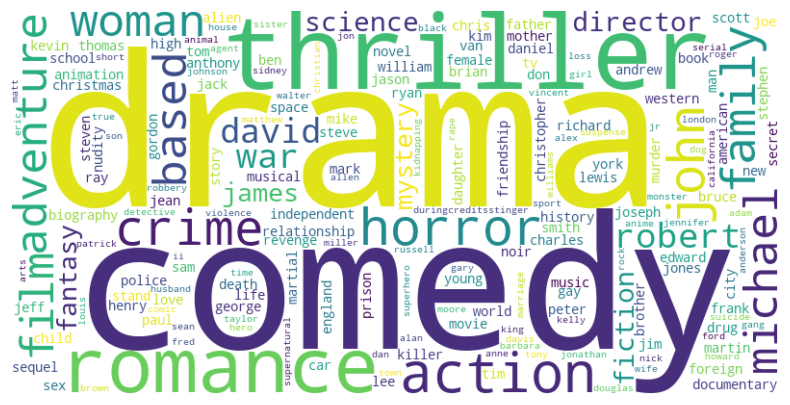

In [270]:
word_freq_dict = word_freq_df.set_index('word')['freq'].to_dict()

# Crear el word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq_dict)

# Visualizar el word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

Nuevamente se calcula la similitud coseno:

In [271]:
similarity_matrix = cosine_similarity(tags_matrix,tags_matrix)

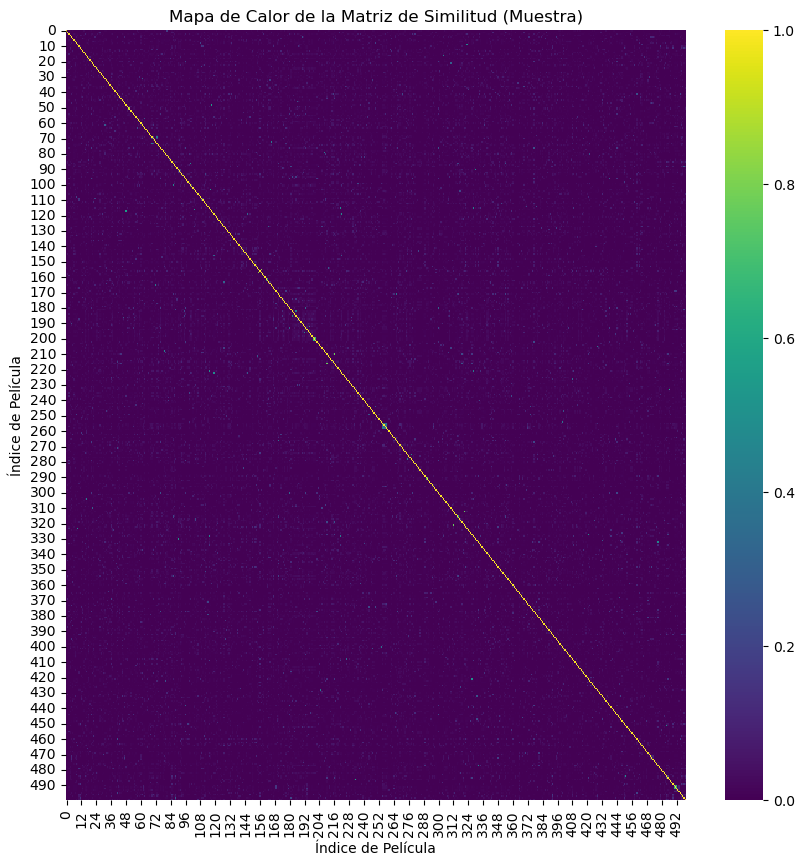

In [272]:
sampled_matrix = similarity_matrix[:500, :500]

# Crear el mapa de calor
plt.figure(figsize=(10, 10))
sns.heatmap(sampled_matrix, cmap='viridis')
plt.title('Mapa de Calor de la Matriz de Similitud (Muestra)')
plt.xlabel('Índice de Película')
plt.ylabel('Índice de Película')
plt.show()

Se grafico la matriz sobre la misma muestra y se pueden ver resultados un poco mas representativos que utilizando unicamente la descripcion de la pelicula.

In [273]:
def recommender(movie, n=30):
    # Encuentra el índice de la película proporcionada en el DataFrame.
    idx = df.loc[df['title'] == movie, :].index[0]

    # Obtén los puntajes de similitud con otras películas.
    similarity_score = list(enumerate(similarity_matrix[idx]))

    # Ordena los puntajes de similitud en orden descendente.
    similarity_score = sorted(similarity_score, key=lambda x: x[1], reverse=True)

    # Selecciona los puntajes de las 'n' películas más similares, excluyendo la primera que es la propia película introducida.
    similarity_score = similarity_score[1:n + 1]

    # Obtiene los índices de las películas más similares y sus puntajes de similitud.
    movie_indices = [i[0] for i in similarity_score]
    scores = [i[1] for i in similarity_score]

    # Crea un DataFrame con títulos de películas y sus puntajes de similitud.
    pd.set_option('display.float_format', '{:.2f}'.format)
    movie_scores = pd.DataFrame({
        'title': df['title'].iloc[movie_indices],
        'similarity_score': scores
    })

    return movie_scores

In [274]:
movie = df.loc[0,'title']
print('Película: ', movie)

recomendacion = recommender(movie,5)
print('Películas similares: ')
for index, row in recomendacion.iterrows():
    print(f"- {row['title']} (Score: {row['similarity_score']:.3f})")

Película:  !Women Art Revolution
Películas similares: 
- Teknolust (Score: 0.849)
- Conceiving Ada (Score: 0.814)
- Trial and Error (Score: 0.213)
- Humpday (Score: 0.204)
- Changing Habits (Score: 0.195)


In [275]:
movie = 'Despicable Me'
print('Película: ', movie)

recomendacion = recommender(movie,5)
print('Películas similares: ')
for index, row in recomendacion.iterrows():
    print(f"- {row['title']} (Score: {row['similarity_score']:.3f})")

Película:  Despicable Me
Películas similares: 
- The Big Heat (Score: 0.485)
- You Only Live Once (Score: 0.438)
- While the City Sleeps (Score: 0.436)
- The Blue Gardenia (Score: 0.430)
- Man Hunt (Score: 0.425)


In [276]:
movie = "Harry Potter and the Philosopher's Stone"
print('Película: ', movie)

recomendacion = recommender(movie,5)
print('Películas similares: ')
for index, row in recomendacion.iterrows():
    print(f"- {row['title']} (Score: {row['similarity_score']:.3f})")

Película:  Harry Potter and the Philosopher's Stone
Películas similares: 
- Broadway Babies (Score: 0.571)
- Hard to Handle (Score: 0.551)
- Gypsy (Score: 0.550)
- Lovely to Look At (Score: 0.550)
- No Time For Sergeants (Score: 0.544)


### Memory Based Collaborative Recommender (Filtros Colaborativos):

#### User - User:

Recomienda películas que usuarios con gustos similares han disfrutado.

#### Item - Item:

Si a un usuario le gustó una pelicula, el sistema podría recomendar otras películas bien calificadas por aquellos que también disfrutaron esa pelicula.

### Hybrid Recommender:

Combinación de varias técnicas, por ejemplo, usando tanto recomendaciones basadas en contenido como colaborativas.

Por ejemplo, podría sugerir películas basadas en los géneros preferidos del usuario y también en lo que usuarios similares han visto.

### Model-Based Collaborative Filtering:

Implementa modelos de aprendizaje automático para predecir las preferencias del usuario.

Por ejemplo, utilizar un modelo de factorización de matrices para predecir las calificaciones de películas que un usuario aún no ha visto.

# Deploy: